In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

Load in the data

In [13]:
df = pd.read_csv('no_null_df.csv')

# Drop 'Unnamed: 0' index column

df = df.drop(columns=['Unnamed: 0'])

Separate String Variables that can't be used for Linear Regression. Separate target variable PPR/G 

In [14]:
# Separate String variables that can't be used for Linear Regression

string_variables = ['Player', 'Tm', 'Season', 'PosRank']
X_string_features = df[string_variables]

# Separate target variable PPR/G

y = df['PPR/G']

# Collect data for all variables being used in Linear Regression

X = df.drop(columns=string_variables)
X = X.drop(columns=['PPR/G'])

print(X.dtypes)

Age                         int64
PPR/G_prev                float64
avg_depth_of_target       float64
caught_percent            float64
grades_offense            float64
grades_pass_route         float64
route_rate                float64
slot_rate                 float64
wide_rate                 float64
inline_rate               float64
yprr                      float64
man_grades_pass_route     float64
zone_grades_pass_route    float64
grades_pass               float64
pbe                       float64
Pass Plays/G              float64
Receptions/G              float64
Routes/G                  float64
Targets/G                 float64
TD/G                      float64
YDS/G                     float64
YAC/G                     float64
RZ Targets/G              float64
P_Att/G                   float64
P_Cmp/G                   float64
P_TD/G                    float64
P_Yds/G                   float64
dtype: object


Split the data

In [15]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Create Random Forest

In [16]:
# Initialize the model
rf = RandomForestRegressor(n_estimators=1000, random_state=42)

# Train the model
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

Use Random Forest to make predictions

In [17]:

y_pred = rf.predict(X_test)

# Combine predictions with string features for further analysis
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#results_with_strings = pd.concat([results_df, X_string_features.loc[X_test.index].reset_index(drop=True)], axis=1)

print(results_df)

        Actual  Predicted
521   6.800000   7.050684
941   6.176471  10.449714
741   3.542857   5.245966
980   2.511111   5.281436
411   2.700000   5.237726
..         ...        ...
332  13.568750  16.123771
208  16.337500  12.757001
992   1.436364   2.607855
78    3.388889   5.301445
29   19.166667  14.427124

[201 rows x 2 columns]


Evaluate Model

In [18]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 12.58
R^2 Score: 0.63


Analyze Feature Weights

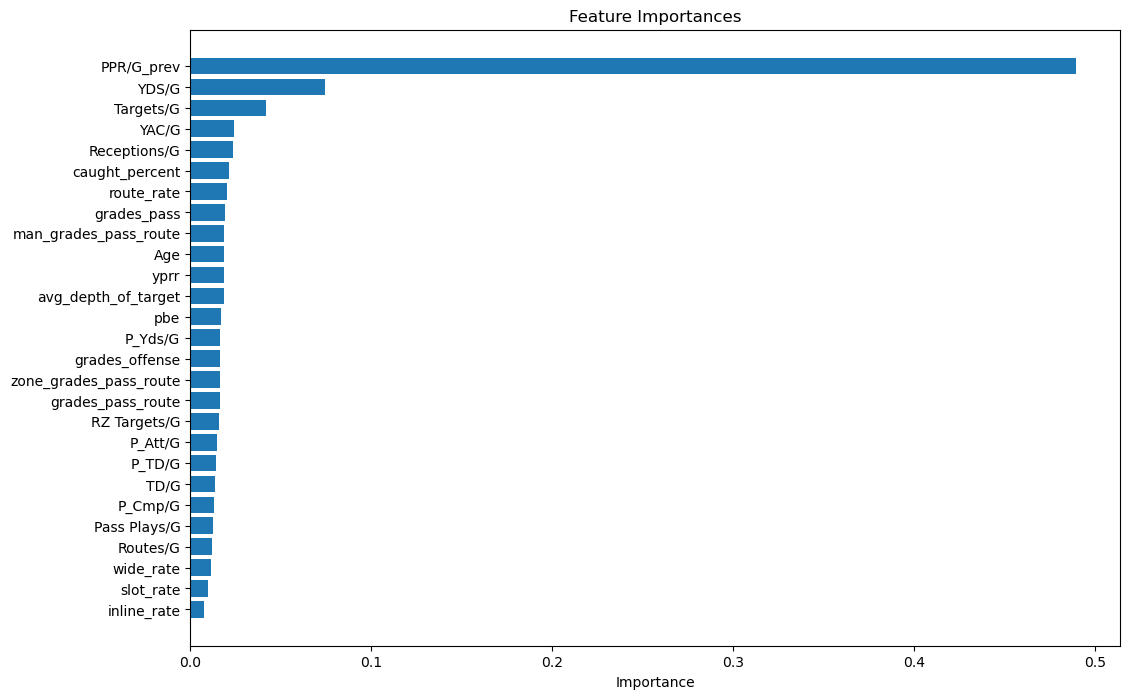

In [19]:
# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()